<a href="https://colab.research.google.com/github/Common-diseases-Health-Research/CVDScreener/blob/main/CVD_risk_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3 Artificial Neural Network(ANN)s:

Model_1: hidden layer 1, Adam.

Model_2: hidden layer 2, Adam, Relu, epoch=20.

Model_3: hidden layer, Adam, Softmax, epoch=100

1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)



# import libraries

In [1]:
# cleveland data only
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# reading data
cvd_patient_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",sep=',')
cvd_patient_data.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","CVDriskindicator"]


# using pandas to deal with invalid values and data type in column ca and thal


In [2]:
cvd_patient_data.dtypes

age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                   object
thal                 object
CVDriskindicator      int64
dtype: object

In [3]:
# drop '?' rows
ca_data, thatl_data = cvd_patient_data[['ca','thal']]


In [4]:
cvd_patient_data[['ca','thal']] = cvd_patient_data[['ca','thal']].replace(to_replace='?',value=-1)

In [5]:
# working
cvd_patient_data[['ca','thal']]=cvd_patient_data[['ca','thal']].apply(pd.to_numeric)
print(cvd_patient_data.dtypes)

age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                  float64
thal                float64
CVDriskindicator      int64
dtype: object


* testing 10/24
pd.to_numeric(cvd_patient_data,downcast=tf.float32)
print(cvd_patient_data.dtypes)

In [6]:
# replace -1 in 'ca' and 'thal' with mean.value of repsective col
ca_mean = cvd_patient_data['ca'].mean()
ca_mean = ca_mean.round()
ca_mean

1.0

In [7]:
# replace -1 in 'ca' and 'thal' with mean.value of repsective col
thal_mean = cvd_patient_data['thal'].mean()
thal_mean = thal_mean.round()
thal_mean

5.0

*Note:*
* replacing -1 in 'ca' with mean(0.65) rounded to 1
* replace -1 in 'thal' with mean(4.69) rounded to 5


In [8]:
cvd_patient_data['ca'] = cvd_patient_data['ca'].replace(to_replace=-1,value=ca_mean)

In [9]:
cvd_patient_data['thal'] = cvd_patient_data['thal'].replace(to_replace=-1,value=thal_mean)

In [10]:
# fixed 'ca' nd 'thal'
tf.cast(cvd_patient_data,tf.float32)
cvd_patient_data.dtypes

age                 float64
sex                 float64
cp                  float64
trestbps            float64
chol                float64
fbs                 float64
restecg             float64
thalach             float64
exang               float64
oldpeak             float64
slope               float64
ca                  float64
thal                float64
CVDriskindicator      int64
dtype: object

In [11]:
cvd_patient_data['CVDriskindicator'].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: CVDriskindicator, dtype: int64

<Axes: >

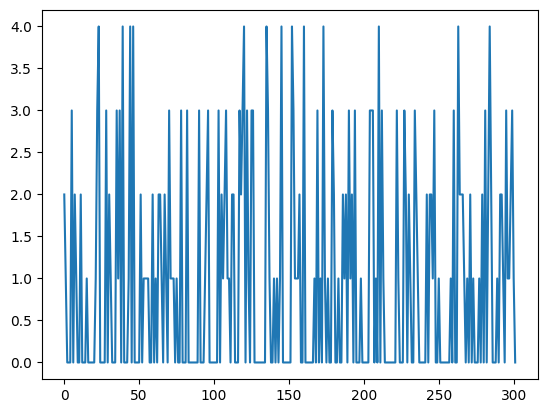

In [12]:
cvd_patient_data["CVDriskindicator"].plot()

In [13]:
cvd_patient_data['age'].value_counts()

58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
64.0    10
41.0    10
67.0     9
42.0     8
45.0     8
43.0     8
63.0     8
53.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
46.0     7
48.0     7
47.0     5
49.0     5
35.0     4
70.0     4
68.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
38.0     2
29.0     1
77.0     1
74.0     1
76.0     1
Name: age, dtype: int64

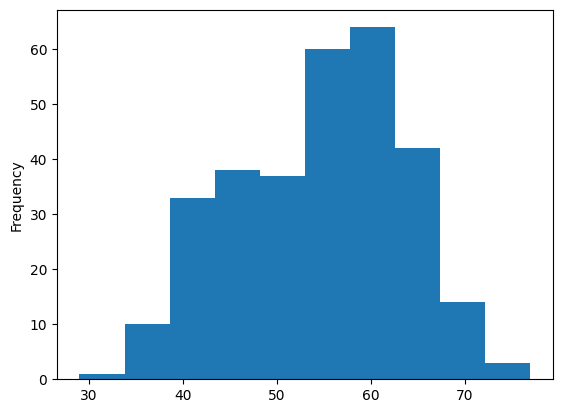

In [14]:
# visualzing cols
cvd_patient_data["age"].plot(kind="hist");

<Axes: ylabel='Frequency'>

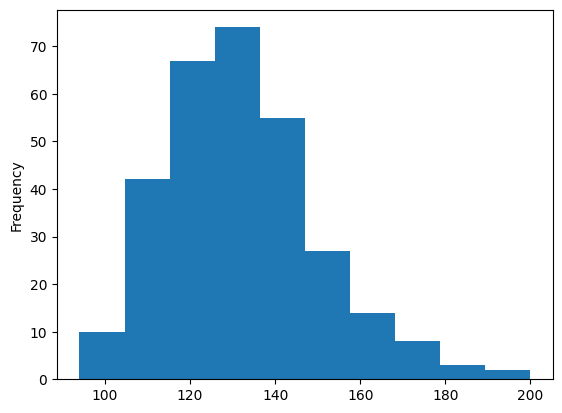

In [15]:
# visualizng predictor variable
cvd_patient_data["trestbps"].plot(kind="hist")

# Preparing data for neural classification

In [16]:
cvd_patient_data = cvd_patient_data.values
cvd_patient_data

array([[67.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       [37.,  1.,  3., ...,  0.,  3.,  0.],
       ...,
       [57.,  1.,  4., ...,  1.,  7.,  3.],
       [57.,  0.,  2., ...,  1.,  3.,  1.],
       [38.,  1.,  3., ...,  1.,  3.,  0.]])

In [19]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create X and y
# Create X and y
X = cvd_patient_data[:,0:13] # [all rows, cols 0th-13th]
y = cvd_patient_data[:,-1] # [all rows, col 14th]

#X = df.iloc[:,1:15] #independent var
#y = df['Weir']

# minmax
mnx = MinMaxScaler()
X = mnx.fit_transform(X)
# onehotencode
ohe = OneHotEncoder()
y_pred = ohe.fit_transform(y.reshape(-1,1)).toarray() # require 2d-array

# return type for y should be "numpy array"

# Create train nd test data
X_train, X_test, y_train, y_test = train_test_split(X,y_pred,test_size=0.2,random_state=42)


In [20]:
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [21]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [22]:
X_train.shape, y_train.shape

((241, 13), (241, 5))

In [23]:
len(X), len(X_train), len(X_test)

(302, 241, 61)

In [24]:
y_pred.shape

(302, 5)

In [25]:
pd.DataFrame(X_train[0:11,0:13])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.458333,1.0,1.000000,0.433962,0.308219,0.0,1.0,0.877863,1.0,0.000000,0.0,0.000000,0.00
1,0.729167,0.0,0.666667,0.433962,0.426941,0.0,0.0,0.473282,0.0,0.032258,0.0,0.000000,1.00
2,0.333333,0.0,1.000000,0.415094,0.251142,0.0,1.0,0.618321,1.0,0.032258,0.5,0.000000,0.00
3,0.645833,1.0,1.000000,0.292453,0.301370,0.0,1.0,0.534351,1.0,0.451613,0.5,0.333333,1.00
4,0.562500,1.0,1.000000,0.358491,0.132420,0.0,1.0,0.259542,1.0,0.338710,0.5,0.333333,0.75
5,0.458333,0.0,1.000000,0.339623,0.408676,0.0,0.0,0.541985,1.0,0.193548,0.5,0.000000,1.00
6,0.708333,0.0,0.666667,0.386792,0.287671,0.0,1.0,0.770992,0.0,0.000000,0.0,0.000000,0.00
7,0.583333,0.0,1.000000,0.245283,0.520548,0.0,0.0,0.702290,1.0,0.096774,0.0,0.000000,0.00
8,0.291667,1.0,0.666667,0.339623,0.431507,0.0,0.0,0.694656,0.0,0.306452,0.0,0.333333,0.00
9,0.645833,1.0,1.000000,0.216981,0.237443,1.0,0.0,0.679389,1.0,0.225806,0.0,0.666667,1.00


# Training models:
`Model_1`: 1 hidden layer, Adam, Relu, softmax epoch=10

`Model_2`: 2 hidden layer, epoch=50

`Model_3`: 2 hidden layer, epoch=100


In [26]:
# random seed
tf.random.set_seed(42)
# create model
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit model
m1_norm_history = m1.fit(X_train,
                         y_train,
                         epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 1.8449 - accuracy: 0.0954
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 1.8091 - accuracy: 0.0913
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 1.7759 - accuracy: 0.0913
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 1.7478 - accuracy: 0.0954
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 1.7237 - accuracy: 0.1120
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 1.7012 - accuracy: 0.1286
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 1.6805 - accuracy: 0.1494
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 1.6630 - accuracy: 0.1909
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 1.6469 - accuracy: 0.2199
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 1.6316 - accuracy: 0.2365


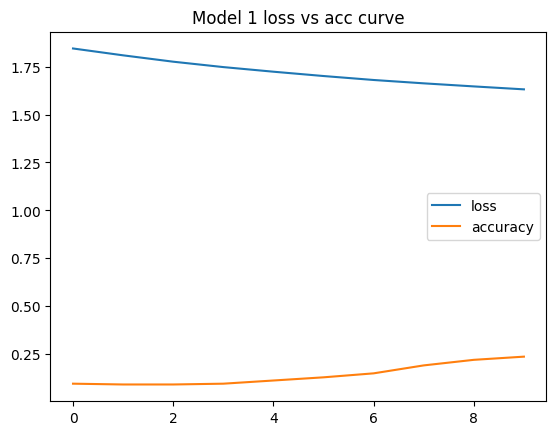

In [27]:
pd.DataFrame(m1_norm_history.history).plot(title="Model 1 loss vs acc curve");

In [28]:
# evaluate model 1
loss, accuracy = m1.evaluate(X_test, y_test)
print(f"Model loss on test set:{loss}")
print(f"Model acc on test set:{(accuracy*100):.2f}")
# checking predictions for model 5
m1_preds = m1.predict(X_test)

# converting model 5 predition probablities into correct format
m1_preds = m1_preds.argmax(axis=1)
m1_preds

2/2 [==============================] - 0s 10ms/step - loss: 1.6296 - accuracy: 0.2459
Model loss on test set:1.6296155452728271
Model acc on test set:24.59
2/2 [==============================] - 0s 6ms/step


array([4, 0, 3, 3, 0, 3, 4, 3, 1, 3, 0, 0, 0, 4, 0, 1, 1, 3, 3, 0, 0, 3,
       3, 1, 4, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 0, 0, 1, 1, 3, 1, 3, 2, 1,
       3, 0, 4, 0, 3, 0, 0, 0, 0, 1, 1, 3, 3, 1, 0, 0, 0])

Model 2:
- added hidden layer (same # of units)
- epoch = 50

In [29]:
# model 2
# random seed
tf.random.set_seed(42)
# create model
m2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit model
m2_norm_history = m2.fit(X_train,
                         y_train,
                         epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 5ms/step - loss: 1.6396 - accuracy: 0.2531
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 1.6253 - accuracy: 0.2739
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 1.6123 - accuracy: 0.3071
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 1.6011 - accuracy: 0.3237
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 1.5914 - accuracy: 0.3402
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 1.5811 - accuracy: 0.3610
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 1.5714 - accuracy: 0.3734
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 1.5618 - accuracy: 0.4066
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 1.5517 - accuracy: 0.4689
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 1.5406 - accuracy: 0.4896
Epoch 11/50
8/8 [======================

- Model 2 shows steady decrease in loss and increase in acc. This implies model is learning to classify CVD patient slowly.
- Need to train longer time
Model 3: similar to model 2 epoch=500

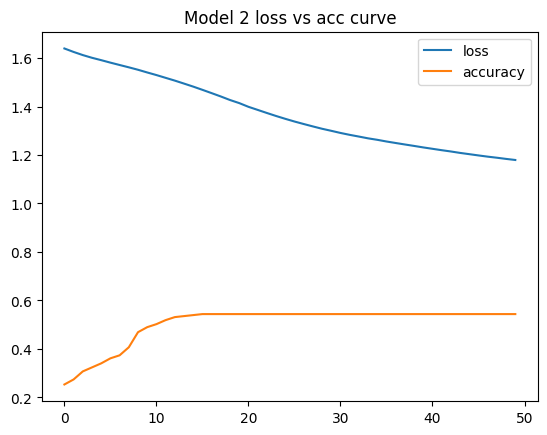

In [30]:
# Plot loss vs acc curve for model 3
pd.DataFrame(m2_norm_history.history).plot(title="Model 2 loss vs acc curve",);

Model 3:
- epoch =500

In [31]:
# model 3
# random seed
tf.random.set_seed(42)
# create model
m3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(1e-3),
                metrics=['accuracy'])
# fit model
m3_norm_history = m3.fit(X_train,
                         y_train,
                         epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 4ms/step - loss: 1.6146 - accuracy: 0.1784
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 1.5978 - accuracy: 0.1909
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5824 - accuracy: 0.2033
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5674 - accuracy: 0.2241
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 1.5538 - accuracy: 0.2365
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 1.5397 - accuracy: 0.2614
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 1.5270 - accuracy: 0.2697
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 1.5147 - accuracy: 0.3195
Epoch 9/500
8/8 [==============================] - 0s 4ms/step - loss: 1.5024 - accuracy: 0.3776
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 1.4892 - accuracy: 0.4315
Epoch 11/500
8/8 [===========

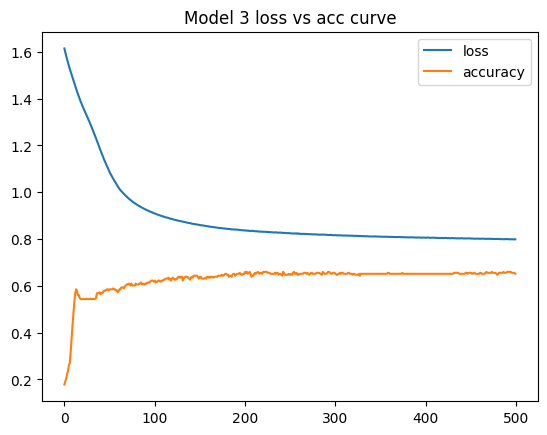

In [32]:
# Plot loss vs acc curve for model 3
pd.DataFrame(m3_norm_history.history).plot(title="Model 3 loss vs acc curve",);

# Imporving model ideas
- Is it critical to assign labels (aka training labels and test labels per data these labels will be severity of CVD lvl 0, 1 and so on. Refer to [link](https://colab.research.google.com/drive/1E6YHzg_1YIa2K4-Bp-DZszd33g7_2I-a?authuser=1#scrollTo=OMuA2YjRMLTR) for details
- Is it beneficial to use validate data option in fitting model?


**Model 3 shows that our model is learning to classify gradually. This means:**


Potential improvement steps:
- use lr = 0.01 for Adam


If the above change improve acc, then consider below
* change metric to Confusion matrix with same set up as model 4 [ check with team]
* find ideal learning rate [ check with team]


**NOTE:If model is still underperforming consult with project team**

### model 4:
model update
 adam's, lr = 1e-2


In [33]:
# model 4
# random seed
tf.random.set_seed(42)
# create model
m4 = tf.keras.Sequential([
    # is there a need to define input_shape?
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax")
])

# compile model
m4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                metrics=['accuracy'])
# fit model
m4_norm_history = m4.fit(X_train,
                         y_train,
                         epochs=250)

Epoch 1/250
8/8 [==============================] - 2s 4ms/step - loss: 1.5946 - accuracy: 0.3610
Epoch 2/250
8/8 [==============================] - 0s 4ms/step - loss: 1.5778 - accuracy: 0.5104
Epoch 3/250
8/8 [==============================] - 0s 4ms/step - loss: 1.5575 - accuracy: 0.5519
Epoch 4/250
8/8 [==============================] - 0s 4ms/step - loss: 1.5342 - accuracy: 0.5477
Epoch 5/250
8/8 [==============================] - 0s 4ms/step - loss: 1.5108 - accuracy: 0.5436
Epoch 6/250
8/8 [==============================] - 0s 3ms/step - loss: 1.4857 - accuracy: 0.5436
Epoch 7/250
8/8 [==============================] - 0s 5ms/step - loss: 1.4607 - accuracy: 0.5436
Epoch 8/250
8/8 [==============================] - 0s 5ms/step - loss: 1.4365 - accuracy: 0.5436
Epoch 9/250
8/8 [==============================] - 0s 4ms/step - loss: 1.4126 - accuracy: 0.5436
Epoch 10/250
8/8 [==============================] - 0s 4ms/step - loss: 1.3870 - accuracy: 0.5436
Epoch 11/250
8/8 [===========

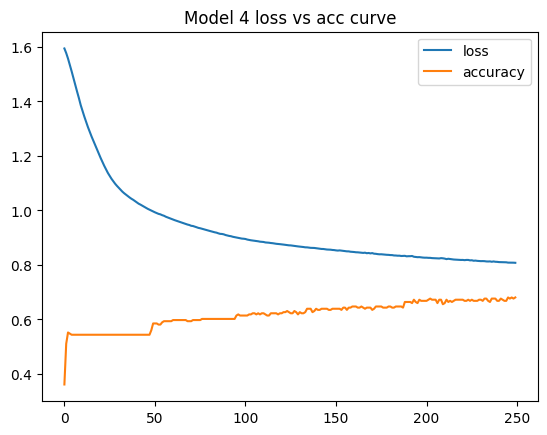

In [34]:
# Plot loss vs acc curve for model 4
pd.DataFrame(m4_norm_history.history).plot(title="Model 4 loss vs acc curve");

In [35]:
# whats max accuracy achieved by model_4
m4_hist_df = pd.DataFrame(m4_norm_history.history)
max_acc_ind = m4_hist_df[['accuracy']].idxmax()
m4_hist_df.iloc[max_acc_ind]


,loss,accuracy
245,0.808393,0.680498


Model 4 showed 75% acc/0.62 loss at some point but at the end it dropped to 72% acc/0.6105  loss. This means that model is overfitting.
>Potential next step of improvement:
- train model with more data
- train new model with another metric [ accuracy -> confusion matrix ] {model 5}
- find ideal learning rate **callback**


# Checking model prediction

In [36]:
# Evaluate model3
loss, accuracy = m4.evaluate(X_test, y_test)
print(f"Model loss on test set:{loss}")
print(f"Model acc on test set:{(accuracy*100):.2f}")


2/2 [==============================] - 0s 10ms/step - loss: 0.9952 - accuracy: 0.5902
Model loss on test set:0.9951581954956055
Model acc on test set:59.02


In [37]:
# checking predictions for model 4
m4_preds = m4.predict(X_test)
m4_preds

2/2 [==============================] - 0s 5ms/step


array([[6.09188318e-01, 3.12748551e-01, 5.88622540e-02, 1.45509578e-02,
        4.64989524e-03],
       [6.68968260e-01, 2.77245998e-01, 4.40078303e-02, 7.17946608e-03,
        2.59831175e-03],
       [9.08947170e-01, 8.91072229e-02, 1.86650374e-03, 6.22048610e-05,
        1.68522620e-05],
       [1.07599579e-01, 2.12724000e-01, 2.67360628e-01, 2.90062517e-01,
        1.22253284e-01],
       [6.31902158e-01, 3.47449988e-01, 2.05464307e-02, 6.09626695e-05,
        4.04815546e-05],
       [6.67705834e-01, 2.78983712e-01, 4.32494730e-02, 7.47164525e-03,
        2.58926651e-03],
       [1.07599579e-01, 2.12724000e-01, 2.67360628e-01, 2.90062517e-01,
        1.22253284e-01],
       [1.49159906e-02, 5.14176130e-01, 4.70353782e-01, 2.10642262e-04,
        3.43423570e-04],
       [7.60970652e-01, 2.16365665e-01, 1.97495949e-02, 2.19875295e-03,
        7.15390488e-04],
       [9.05787528e-01, 9.15674940e-02, 2.55843112e-03, 6.29371934e-05,
        2.34953568e-05],
       [1.45214006e-01, 2.5043

In [38]:
# converting m4 predition probablities into correct format
m4_preds = m4_preds.argmax(axis=1)
m4_preds
# y_preds = y_probs.argmax(axis=1)

array([0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 2, 0, 0, 3, 3, 2, 3, 3, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0,
       1, 3, 0, 1, 2, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0])

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_.predict(X_test)

# create confusion matrix
confusion_matrix(y_test,y_preds) # will give Error can't handle a mix of binary and continuous targets

Confusion Matrix docs:

- https://scikit-learn.org/stable/modules/model_evaluation.html#average

  ***"weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.***
